In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, download=True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)



In [ ]:
class FCN(nn.Module):
    def __init__(self):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x



In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

def train_model(model, train_loader, criterion, optimizer, device, num_epochs=5):
    model.train()
    start_time = time.time()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")
    training_time = time.time() - start_time
    return training_time

def evaluate_model(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

fcn = FCN().to(device)
cnn = CNN().to(device)
criterion = nn.CrossEntropyLoss()
fcn_optimizer = optim.Adam(fcn.parameters(), lr=0.001)
cnn_optimizer = optim.Adam(cnn.parameters(), lr=0.001)

fcn_params = count_parameters(fcn)
cnn_params = count_parameters(cnn)
print(f"Number of parameters in FCN: {fcn_params}")
print(f"Number of parameters in CNN: {cnn_params}")

Number of parameters in FCN: 535818
Number of parameters in CNN: 421642


In [ ]:
def evaluate_model(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy



In [ ]:
fcn = FCN().to(device)
cnn = CNN().to(device)
criterion = nn.CrossEntropyLoss()
fcn_optimizer = optim.Adam(fcn.parameters(), lr=0.001)
cnn_optimizer = optim.Adam(cnn.parameters(), lr=0.001)

fcn_params = count_parameters(fcn)
cnn_params = count_parameters(cnn)


Training FCN:
Epoch [1/5], Loss: 0.4862
Epoch [2/5], Loss: 0.3663
Epoch [3/5], Loss: 0.3274
Epoch [4/5], Loss: 0.3025
Epoch [5/5], Loss: 0.2823

Training CNN:
Epoch [1/5], Loss: 0.4362
Epoch [2/5], Loss: 0.2821
Epoch [3/5], Loss: 0.2322
Epoch [4/5], Loss: 0.2035
Epoch [5/5], Loss: 0.1758


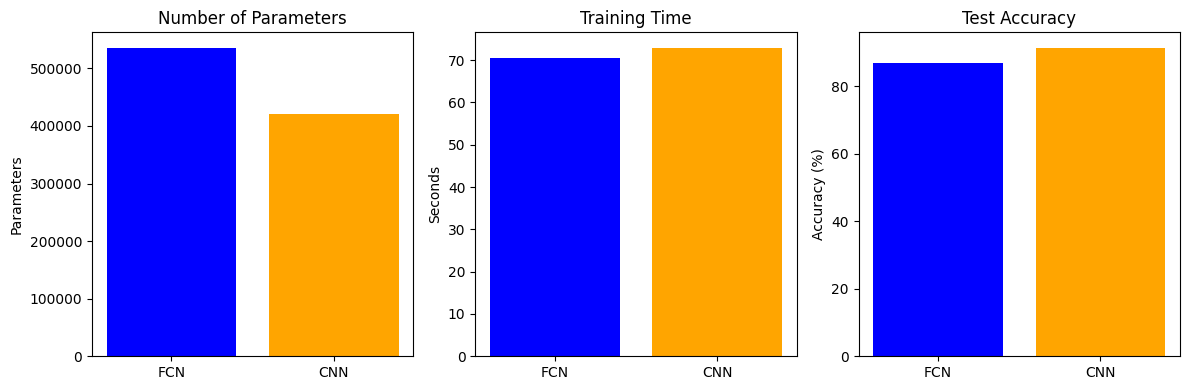

In [ ]:
print("\nTraining FCN:")
fcn_training_time = train_model(fcn, train_loader, criterion, fcn_optimizer, device)
fcn_accuracy = evaluate_model(fcn, test_loader, device)

print("\nTraining CNN:")
cnn_training_time = train_model(cnn, train_loader, criterion, cnn_optimizer, device)
cnn_accuracy = evaluate_model(cnn, test_loader, device)

labels = ["FCN", "CNN"]
parameters = [fcn_params, cnn_params]
training_times = [fcn_training_time, cnn_training_time]
accuracies = [fcn_accuracy, cnn_accuracy]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.bar(labels, parameters, color=["blue", "orange"])
plt.title("Number of Parameters")
plt.ylabel("Parameters")

plt.subplot(1, 3, 2)
plt.bar(labels, training_times, color=["blue", "orange"])
plt.title("Training Time")
plt.ylabel("Seconds")

plt.subplot(1, 3, 3)
plt.bar(labels, accuracies, color=["blue", "orange"])
plt.title("Test Accuracy")
plt.ylabel("Accuracy (%)")

plt.tight_layout()
plt.show()